<strong>由感知机到神经网络的入门</strong>

In [1]:
#导入包
import numpy as np
import matplotlib.pyplot as plt

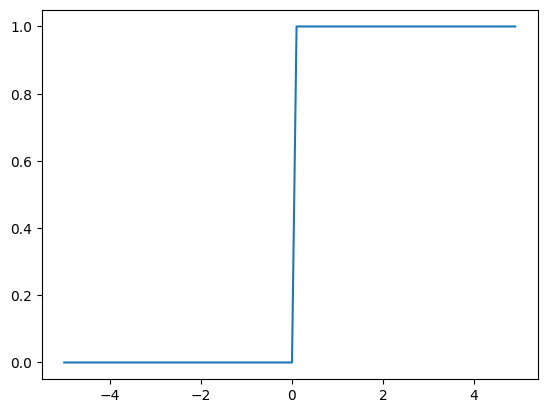

In [2]:
#阶跃函数展示
def skip(x):
    y = x > 0
    return y.astype(np.int32)#将bool型数组转化为int,False默认为0,True为1
    
x = np.arange(-5,5,0.1)
y = skip(x)

plt.plot(x,y)
plt.show()

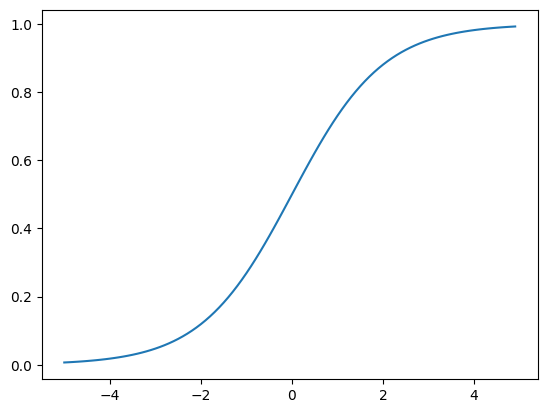

In [3]:
#sigmoid函数
def sigmoid(x):
    y = 1/(1 + np.exp(-x))
    return y

x = np.arange(-5,5,0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.show()

<p>神经网络的激活函数必须使用非线性函数。换句话说，激活函数不能使
用线性函数。<br>为什么不能使用线性函数呢？因为使用线性函数的话，加深神经网络的层数就没有意义了。</p>
<p>线性函数的问题在于，不管如何加深层数，总是存在与之等效的“无
隐藏层的神经网络”。为了具体地（稍微直观地）理解这一点，我们来思
考下面这个简单的例子。<br>这里我们考虑把线性函数 h(x) = cx 作为激活
函数，把y(x) = h(h(h(x)))的运算对应3层神经网络A。这个运算会进行
y(x) = c × c × c × x的乘法运算，但是同样的处理可以由y(x) = ax（注意，
a = c 3
）这一次乘法运算（即没有隐藏层的神经网络）来表示。</p><p>如本例所示，
使用线性函数时，无法发挥多层网络带来的优势。因此，为了发挥叠加层所
带来的优势，激活函数必须使用非线性函数。</p>

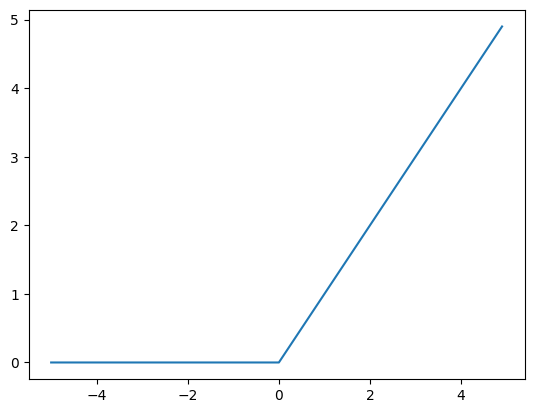

In [4]:
#relu函数

def relu(x):
    return np.maximum(0,x)

x = np.arange(-5,5,0.1)
y = relu(x)

plt.plot(x,y)
plt.show()

<strong>以下面的三层神经网络来举例如何前向传播</strong>

![神经网络举例图](images/one.png)

In [5]:
#初始所有数据及权重随机化
#原理:对于一一对应的时候有 a1 = x1*w11 + w2*w12 + b1,为线性组合关系,故可以通过矩阵运算得到整个A

#第0层前向传播
x = np.array([1.7,2.5])
W1 = np.array([[3.4,2.4,5.4],[1.5,8.6,3.8]])
B1 = np.array([2.3,1.2,4])#偏置矩阵的大小取决于下一层的神经元数量

#计算第0层的输出层
A1 = np.dot(x,W1) + B1
print(x.shape,W1.shape,B1.shape)
print(A1)

#将第0层的输出层激活后得到第1层的输入层
Z1 = sigmoid(A1)
print(Z1)

(2,) (2, 3) (3,)
[11.83 26.78 22.68]
[0.99999272 1.         1.        ]


In [6]:
#开始进行1层到2层的前向传播
W2 = np.array([[1.4,12],[3,6],[7,9]])
B2 = np.array([4.5,6.2])
A2 = np.dot(Z1,W2) + B2

print(Z1.shape,W2.shape,B2.shape)
print(A2)

Z2 = sigmoid(A2)
print(Z2)

(3,) (3, 2) (2,)
[15.8999898  33.19991261]
[0.99999988 1.        ]


In [7]:
#开始进行2层到3层(即输出层的传播)
W3 = np.array([[4.3,2.3],[1.5,9.0]])
B3 = np.array([1,2])
A3 = np.dot(Z2,W3) + B3

print(Z2.shape,W3.shape,B3.shape)
print(A3)

#一般情况下,输出层Y没有特别的激活函数
Y = A3


(2,) (2, 2) (2,)
[ 6.79999947 13.29999971]


### 注意
输出层所用的激活函数，要根据求解问题的性质决定。  
一般地,**回归问题**可以使用**恒等函数**;**二元分类问题**可以使用**sigmoid函数**,**多元分类问题**可以使用**softmax函数**  

输出层的激活函数又叫**西格玛函数**,用<strog> σ() </strong>表示,后面详细介绍每种情况

In [8]:
#神经网络函数化

#定义神经元(非输出层)激活函数
def sigmoid(x):
    return 1/(1 + np.exp(-x))

#定义输出层的激活函数
def identity_function(x):
    return x


#构建神经网络
def init_network():
    #将神经网络定义为字典
    network = {}

    #定义网络中的权重矩阵
    network['W1'] = np.array([[3.4,2.4,5.4],[1.5,8.6,3.8]])
    network['W2'] = np.array([[1.4,12],[3,6],[7,9]])
    network['W3'] = np.array([[4.3,2.3],[1.5,9.0]])

    #定义网络中的偏置矩阵
    network['b1'] = np.array([2.3,1.2,4])
    network['b2'] = np.array([4.5,6.2])
    network['b3'] = np.array([1,2])
    
    #返回字典(存储了神经网络的信息)
    return network


#构建前向传播函数,即封装了输入到输出的处理过程
def forword(network,x):
    #network为神经网络,x为输入矩阵(可以理解为待处理输入的特征)

    #进行前向传播的计算
    a1 = np.dot(x,network['W1']) + network['b1']
    z1 = sigmoid(a1)
    a2 = np.dot(z1,network['W2']) + network['b2']
    z2 = sigmoid(a2)
    a3 = np.dot(z2,network['W3']) + network['b3']
    y = identity_function(a3)

    #返回输出层
    return y

network = init_network()
x = np.array([1.7,2.5])
y = forword(network,x)
print(y)

#最终结果与上面的显示结果一致,不过现在处理层被隐藏了


[ 6.79999947 13.29999971]


### 输出层的设计

In [12]:
#softmax函数设计:我理解为输出层归一化操作,即转换为概率输出
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    return y

a = np.array([1,2,3])
y = softmax(x)
print(y,np.sum(y))

#可以发现,概率和为1

#但是由于涉及到指数运算,上面的容易数值溢出,要改进

[0.09003057 0.24472847 0.66524096] 1.0


<strong>改进推导过程如下</strong>

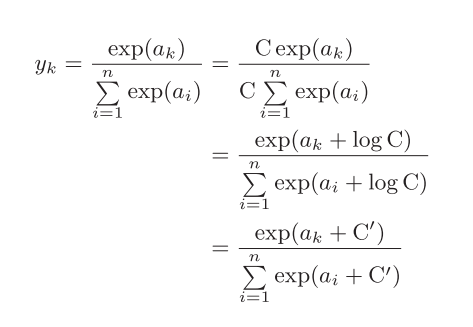

故可以把a中的最大值进行处理,找到一个C',这样可以保证全部数值不溢出

In [13]:
#改进softmax函数如下
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#溢出对策,将指数限制在负数
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    return y

a = np.array([1,2,3])
y = softmax(x)
print(y,np.sum(y))
#与上面结果一致,符合理论


[0.09003057 0.24472847 0.66524096] 0.9999999999999999


<strong>一般而言，神经网络只把输出值最大的神经元所对应的类别作为识别结果。  
并且，即便使用softmax函数，输出值最大的神经元的位置也不会变。因此，  
神经网络在进行分类时，输出层的softmax函数可以省略。在实际的问题中，  
由于指数函数的运算需要一定的计算机运算量，因此输出层的softmax函数一般会被省略。</strong>

### 下面便会进行第一个神经网络的应用:模型评估

In [3]:
#导入包
import cv2
import numpy as np
import pickle

#导入数据集加载函数
from mnist import load_mnist


# 任务:权重参数评估,即对训练结果进行评估

#展示图像
def show(img,title = 'Test'):
    cv2.imshow(title,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

#激活函数sigmoid
def sigmoid(a):
    x = 1/(1 + np.exp(-a))
    return x

#改进的归一化输出层处理
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a

    return y

#加载数据集,获取测试数据(非训练数据)
def get_data():
    (x_train,t_train),(x_test,t_test) = \
    load_mnist(normalize = True,flatten = True,one_hot_label = False)
    return x_test,t_test

#初始化神经网络(获取已经训练好的了)
def init_network():
    #一种简洁的打开并自动关闭读取文件的语句
    # rb:读取二进制格式
    # pickle是存储数据的库,类似json,但是json更广泛,且人类可读
    with open('MNIST_data/sample_weight.pkl','rb') as f:
        network = pickle.load(f) # network像之前学习的一样,是字典格式的,包含权重及偏置矩阵
    return network

#神经网络前向传播,即计算
def predict(network,x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    # print(W1.shape,b1.shape)
    # print(W2.shape,b2.shape)
    # print(W3.shape,b3.shape)
    a1 = np.dot(x,W1) + b1
    Z1 = sigmoid(a1)
    a2 = np.dot(Z1,W2) + b2
    Z2 = sigmoid(a2)
    a3 = np.dot(Z2,W3) + b3

    y = softmax(a3)
    return y

x,t = get_data()
network = init_network()

#对于多个输入的,只能分开来,即目前学习的神经网络输入层的shape要是(x,)形式,否则softmax那里会出错,当然也可以在softmax那一步再循环
#测试识别精度
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network,x[i])
    maxn = np.argmax(y) #获取最大值的索引

    #判断识别结果是否对应标签
    if maxn == t[i]:
        accuracy_cnt += 1

print(f"识别成功率:{accuracy_cnt/len(x)*100}%")


识别成功率:93.52000000000001%


上面的神经网络处理过程仅是单输入,下面介绍更常用的**批处理**  

批处理对计算机的运算大有利处，可以大幅缩短每张图像的处理时  
间。那么为什么批处理可以缩短处理时间呢？这是因为大多数处理  
数值计算的库都进行了能够高效处理大型数组运算的最优化。并且，  
在神经网络的运算中，当数据传送成为瓶颈时，批处理可以减轻数  
据总线的负荷（严格地讲，相对于数据读入，可以将更多的时间用在  
计算上）。也就是说，批处理一次性计算大型数组要比分开逐步计算  
各个小型数组速度更快

In [7]:
# 批处理的核心

x, t = get_data()
network = init_network()
batch_size = 100 # 批数量
accuracy_cnt = 0
for i in range(0, len(x), batch_size):  # 设置了步长
    x_batch = x[i:i+batch_size] # 不包括右端点
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

#回到上次的问题,这样处理softmax不是会出错吗?确实概率变小了,因为sum_exp_a变大了,但是相对大小关系不变即可

Accuracy:0.9352
